In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.wilson_cowan.WilsonCowan.state_variable_range = Const(field_type=<type 'dict'>, default={'I': array([0., 1.]), 'E': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Const(field_type=<type 'dict'>, default={'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.]), 'xi': array([-4.,  4.]), 'eta': array([-3.,  3.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.state_variable_range = Const(field_type=<type 'dict'>, default={'tau': array([ 2., 10.]), 'x

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.hopfield.Hopfield.state_variable_range = Const(field_type=<type 'dict'>, default={'x': array([-1.,  2.]), 'theta': array([0., 1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Const(field_type=<type 'dict'>, default={'y2': array([0., 2.]), 'g': array([-1.,  1.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y1': array([-20.,   2.]), 'x1': array([-2.,  1.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Const(field_type=<type 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING  default contains values out of the declared domain. 

//anaconda/envs/tvb_library_git/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# Simulate with the Jansen and Rit model. 

White noise is added to one specific state variable to emulate the external
stochastic stimulus p(t) as described in [JansenRit_1995]

WARNING  File 'hemispheres' not found in ZIP.


/WORK/TVB_GIT/tvb-library/tvb/simulator/models/jansen_rit.py:291: RuntimeWarning: overflow encountered in _numba_dfun_jr
  self.A, self.b, self.B, self.J, self.mu


<IPython.core.display.Javascript object>


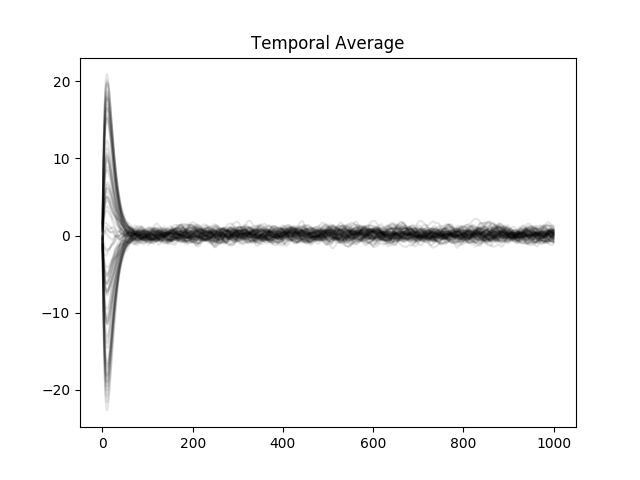

Text(0.5,1,u'Temporal Average')

In [2]:
jrm = models.JansenRit(mu=numpy.array([0.]), v0=numpy.array([6.]))

phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

# the other aspects of the simulator are standard
sim = simulator.Simulator(
    model=jrm,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
    integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=1e3,
).configure()

# run it
(time, data), = sim.run()

# visualize time series
figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1)
title("Temporal Average")